In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [61]:
z = np.linspace(-10, 10, 1000)

In [62]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [63]:
f_z = sigmoid(z)
# f_z

Text(0, 0.5, 'sigmoid(z)')

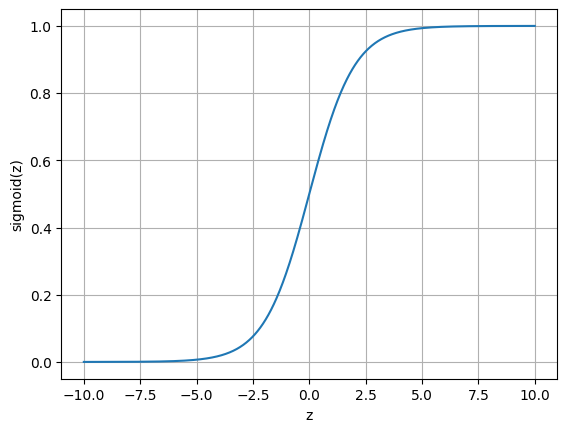

In [64]:
plt.plot(z, f_z)
plt.grid()
plt.xlabel('z')
plt.ylabel('sigmoid(z)')

# Feature Engineering

In [65]:
# https://www.kaggle.com/code/seneralkan/advanced-feature-engineering
# https://www.kaggle.com/learn/feature-engineering

In [66]:
df = pd.read_csv("Advertising.csv", index_col=0)

In [67]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [68]:
import seaborn as sns
df = pd.read_csv("Advertising.csv", index_col=0)


In [69]:
# follow the following links for different type of plots
# https://seaborn.pydata.org/tutorial/axis_grids.html

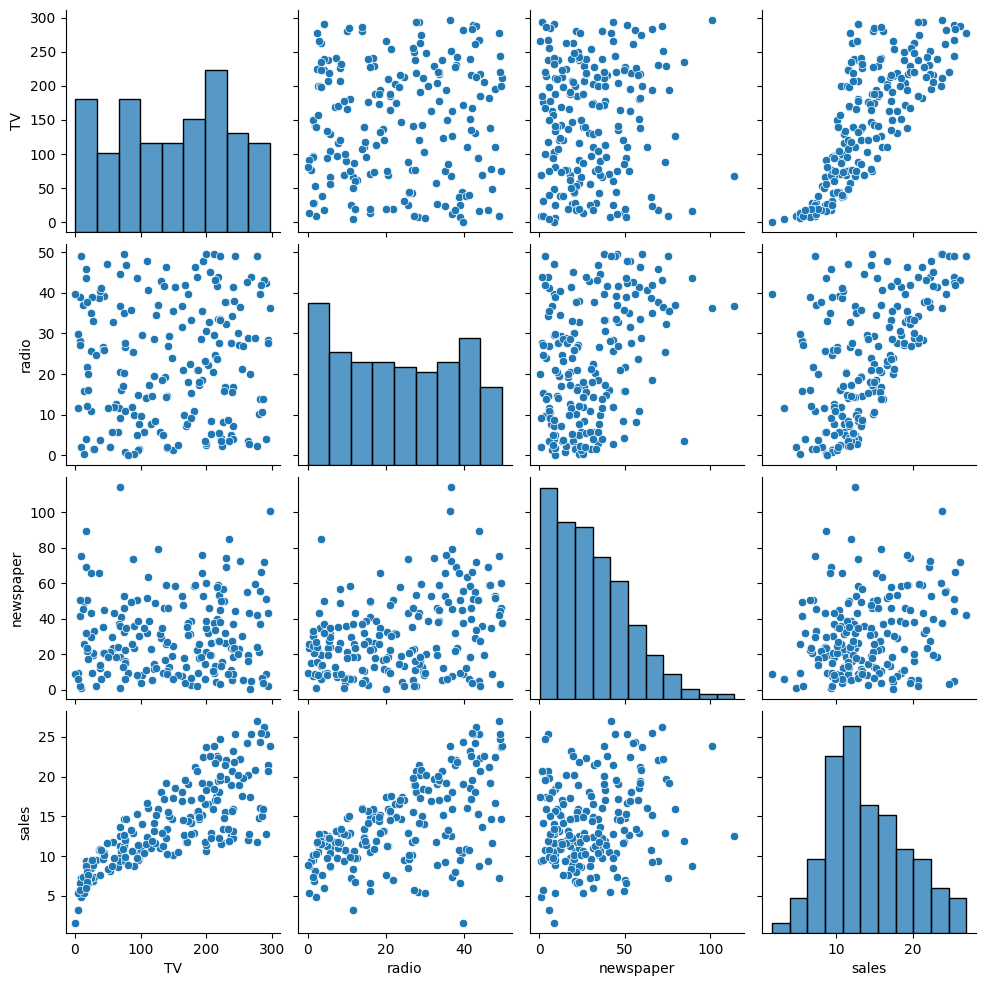

In [70]:
sns.pairplot(df)

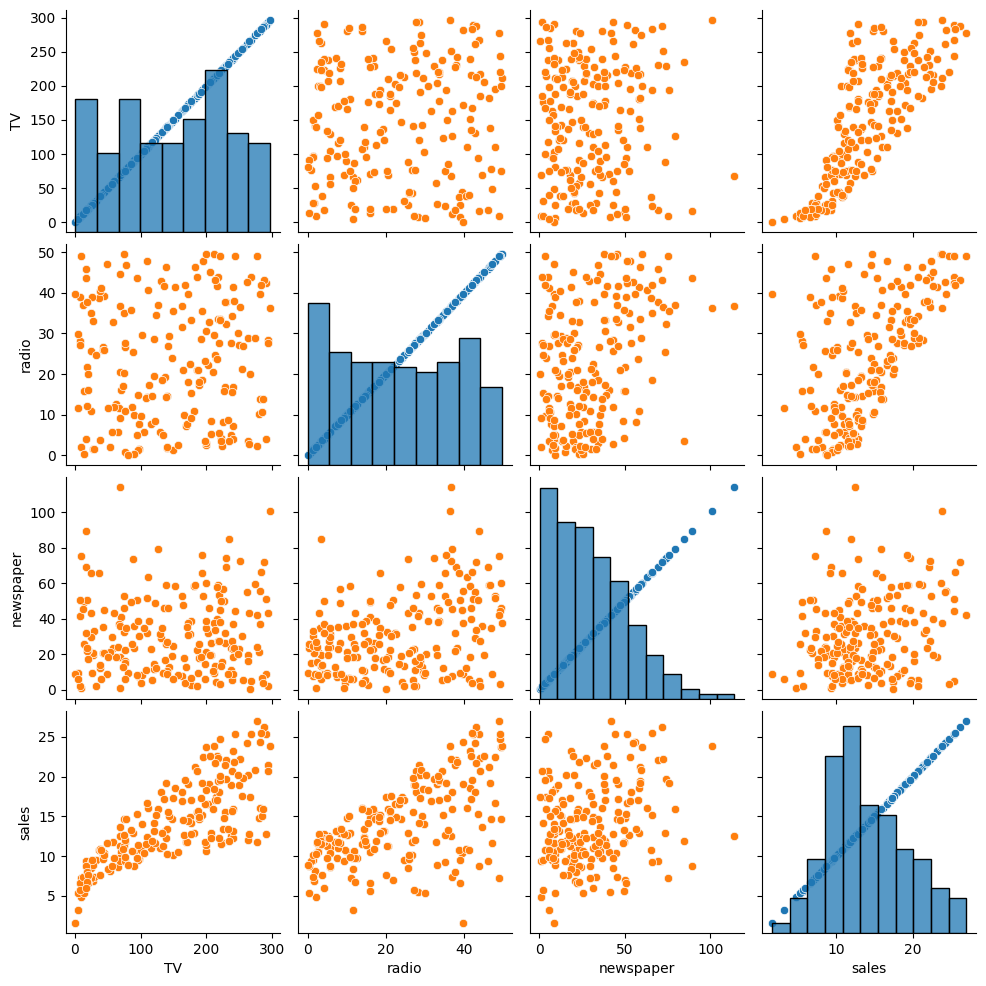

In [71]:

g = sns.pairplot(df)
g.map(sns.scatterplot)

<Axes: >

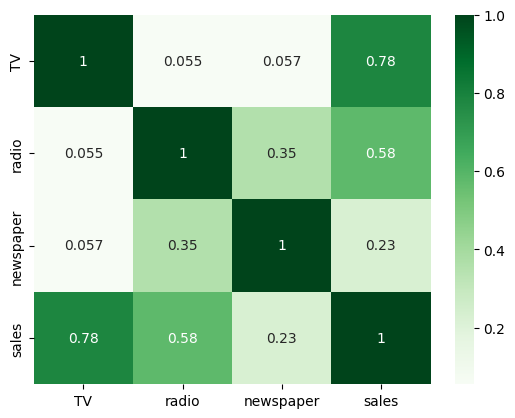

In [72]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

# Iris Dataset 

In [73]:
from sklearn.datasets import load_iris
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
X =  load_iris()['data']
y = load_iris()['target']

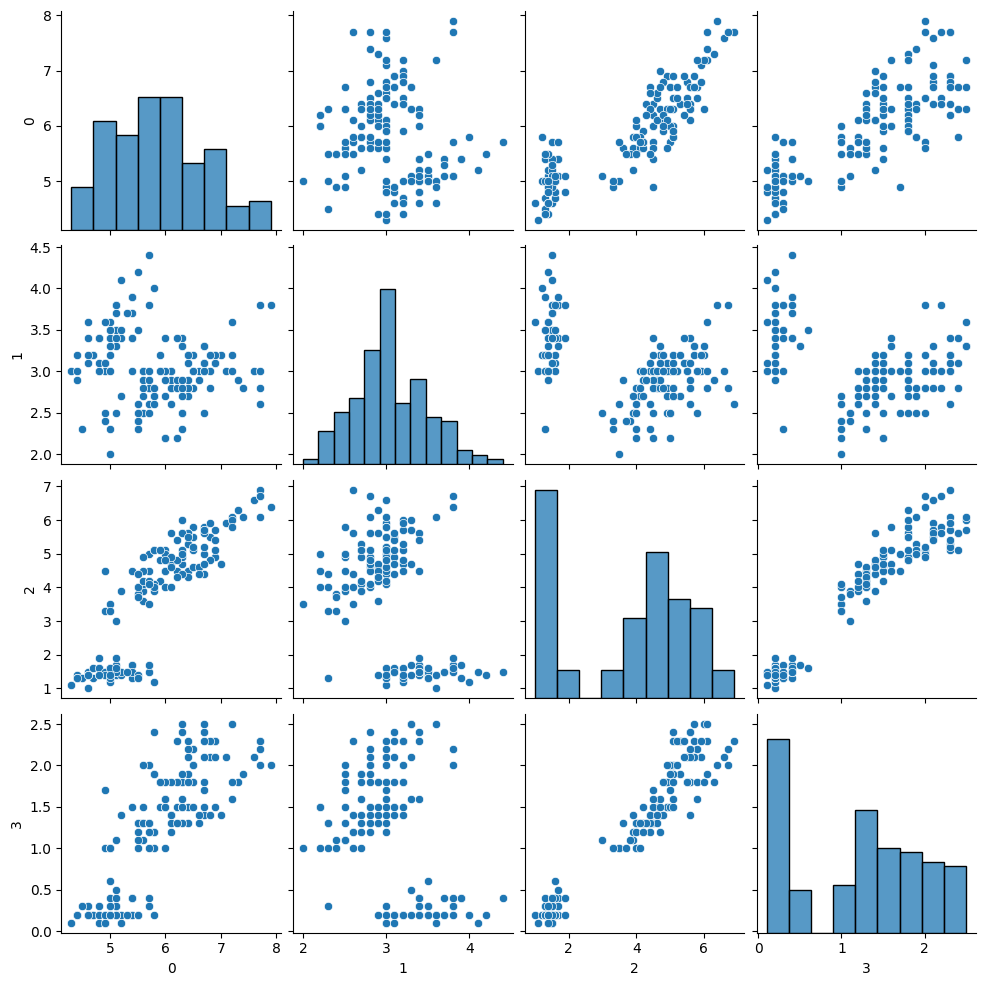

In [75]:
sns.pairplot(pd.DataFrame(X))

# Clustering

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [77]:
# make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

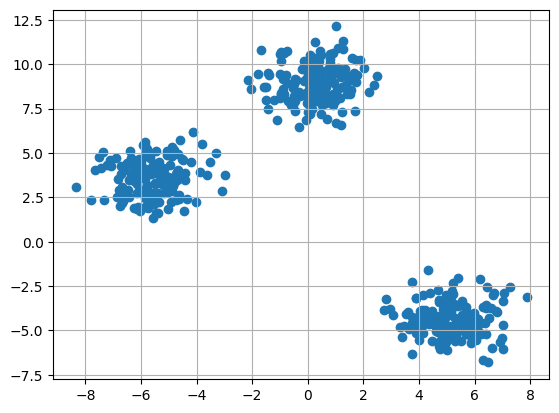

In [78]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [79]:
k = 3 
clusters = {}
np.random.seed(67)
for i in range(k):
    center = np.random.random(X.shape[1])
    print(center)
    cluster = {
        'center': center, 
        'points': []
    }
    clusters[i] = cluster
    print(cluster)

[0.54585143 0.85885661]
{'center': array([0.54585143, 0.85885661]), 'points': []}
[0.68589259 0.33159182]
{'center': array([0.68589259, 0.33159182]), 'points': []}
[0.05999793 0.38627778]
{'center': array([0.05999793, 0.38627778]), 'points': []}


In [80]:
clusters

{0: {'center': array([0.54585143, 0.85885661]), 'points': []},
 1: {'center': array([0.68589259, 0.33159182]), 'points': []},
 2: {'center': array([0.05999793, 0.38627778]), 'points': []}}

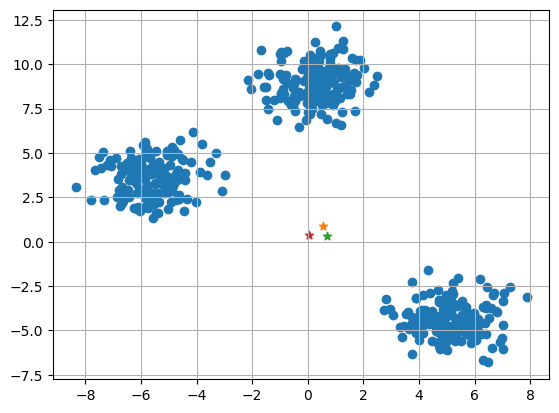

In [81]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
for key in clusters:
    center = clusters[key]['center']
    plt.scatter(center[0], center[1], marker = '*', )

In [82]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

# E step 
def assign_cluster(X, clusters): 
    for idx in range(X.shape[0]): 
        dist = []

        cur_x = X[idx]
        # print(cur_x)
        for cluster_no in clusters:
            cluster = clusters[cluster_no]
            d = distance(cur_x, cluster['center'])
            # print(cluster, d)
            dist.append(d)
        
        cluster_id = np.argmin(dist)
        # print(cluster_id)
        clusters[cluster_id]['points'].append(cur_x)
    return clusters

# M step 
def update_clusters(clusters):
    for idx in clusters:
        cluster = clusters[idx]
        print(cluster)
        if len(cluster['points']) > 0:
            cluster['center'] = np.array(cluster['points']).mean( axis=0)
            cluster['points'] = []
            print(cluster)
    return clusters


# assign_cluster(X, clusters)
# update_clusters(clusters)

In [83]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [84]:
clusters = assign_cluster(X,clusters)
clusters = update_clusters(clusters)
pred = pred_cluster(X,clusters)

{'center': array([0.54585143, 0.85885661]), 'points': [array([-0.7394091 , 10.76263031]), array([0.32168514, 9.69462806]), array([ 0.18461129, 10.13165641]), array([ 0.20969092, 10.20650028]), array([0.35915149, 8.45404202]), array([0.57246942, 9.17315007]), array([-1.41835597,  9.505756  ]), array([ 1.26332633, 11.29399947]), array([ 0.90837998, 10.63902496]), array([0.90816289, 7.72212835]), array([0.15590456, 9.02054242]), array([1.65274092, 9.48856216]), array([ 1.02281779, 12.12675476]), array([-0.73460708,  8.94948138]), array([0.35937993, 9.87519697]), array([-0.77388451,  9.37660962]), array([0.99957366, 8.19343928]), array([-1.42289767,  7.49542074]), array([0.95215317, 8.91671319]), array([-0.1956811 ,  9.73304584]), array([1.19876192, 6.5848948 ]), array([-0.46562426,  9.15038328]), array([-1.22348142,  7.99191329]), array([-0.5146562 ,  8.68062006]), array([0.78710918, 8.12181275]), array([-0.69749232,  7.9293102 ]), array([3.59273554e-03, 8.31576569e+00]), array([ 0.783787

[0.19351144 8.85467682]
[ 5.1482619  -4.38609379]
[-5.69029109  3.60092659]


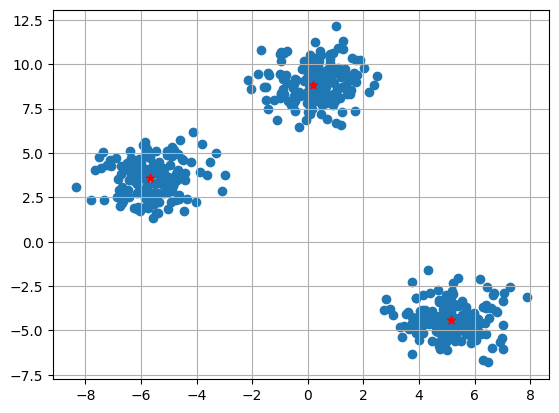

In [85]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
for key in clusters:
    center = clusters[key]['center']
    print(center)
    plt.scatter(center[0], center[1], marker = '*', c='red' )

In [86]:
for epoch in range(10): 
    clusters = assign_cluster(X,clusters)
    clusters = update_clusters(clusters)

{'center': array([0.19351144, 8.85467682]), 'points': [array([-0.7394091 , 10.76263031]), array([0.32168514, 9.69462806]), array([ 0.18461129, 10.13165641]), array([ 0.20969092, 10.20650028]), array([0.35915149, 8.45404202]), array([0.57246942, 9.17315007]), array([-1.41835597,  9.505756  ]), array([ 1.26332633, 11.29399947]), array([ 0.90837998, 10.63902496]), array([0.90816289, 7.72212835]), array([0.15590456, 9.02054242]), array([1.65274092, 9.48856216]), array([ 1.02281779, 12.12675476]), array([-0.73460708,  8.94948138]), array([0.35937993, 9.87519697]), array([-0.77388451,  9.37660962]), array([0.99957366, 8.19343928]), array([-1.42289767,  7.49542074]), array([0.95215317, 8.91671319]), array([-0.1956811 ,  9.73304584]), array([1.19876192, 6.5848948 ]), array([-0.46562426,  9.15038328]), array([-1.22348142,  7.99191329]), array([-0.5146562 ,  8.68062006]), array([0.78710918, 8.12181275]), array([-0.69749232,  7.9293102 ]), array([3.59273554e-03, 8.31576569e+00]), array([ 0.783787

[0.293089   8.93255251]
[ 5.1482619  -4.38609379]
[-5.64869015  3.64917816]


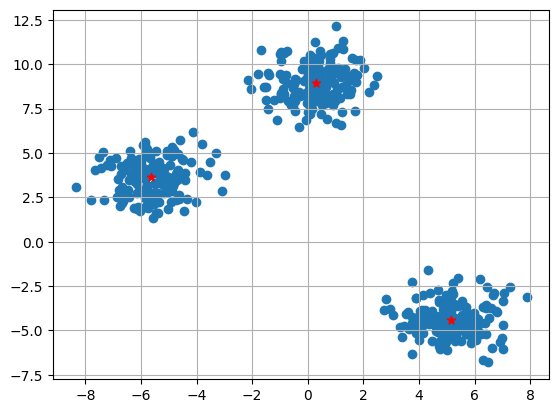

In [87]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()
for key in clusters:
    center = clusters[key]['center']
    print(center)
    plt.scatter(center[0], center[1], marker = '*', c='red' )

In [89]:
from sklearn.cluster import KMeans

km = KMeans(3)
km.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [99]:
sses = []
ks = []
for k in range(2, 11):
    ks.append(k)
    km = KMeans(k)
    km.fit(X)
    # print(km.inertia_)
    sses.append(km.inertia_)

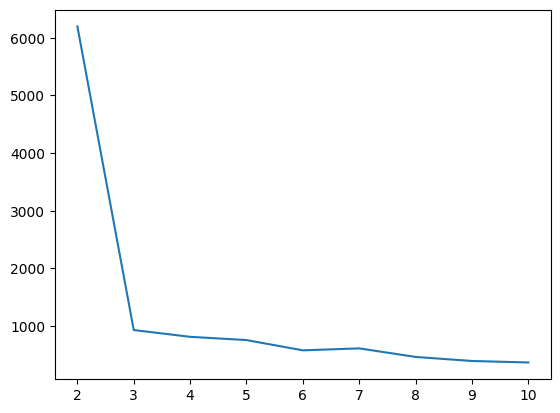

In [100]:
plt.plot(ks, sses)

In [93]:
km.inertia_

932.8452044497946

In [92]:
km.predict(X)

array([2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2,
       1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 0,
       2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0,

In [91]:
y

array([2, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 2,
       0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 2,
       2, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       2, 0, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 1, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1,